## Problem Statement  

You are given an integer $n$. Implement a quantum circuit `qc` with $n$ qubits to prepare the quantum state:  

$$|\psi\rangle = \frac{1}{\sqrt{2}} (|0...0\rangle_n - |1...1\rangle_n).$$  

### Constraints  
- $2 \leq n \leq 15$  
- The circuit depth must not exceed **6**  
- **Global phase is ignored in judge**  
- The submitted code must follow the specified format  

### Sample Input  
**For $n=4$**, the circuit `qc` should perform the transformation:  

$$|0000\rangle \rightarrow \frac{1}{\sqrt{2}} (|0000\rangle - |1111\rangle).$$  

### Output  
The quantum circuit should generate the desired quantum state while ensuring that the depth does not exceed **6**.  


In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def solve(n: int) -> QuantumCircuit:
    qc = QuantumCircuit(n)
    
    qc.h(0)
    
    block_num = int(np.ceil(np.log2(n)))
    
    for i in range(block_num):
        for j in range(2**i):
            qc.cx(control_qubit=j, target_qubit=(2**i)+j)
            if((2**i)+j == n-1):
                break
        qc.barrier()
                
    qc.z(0)

    return qc

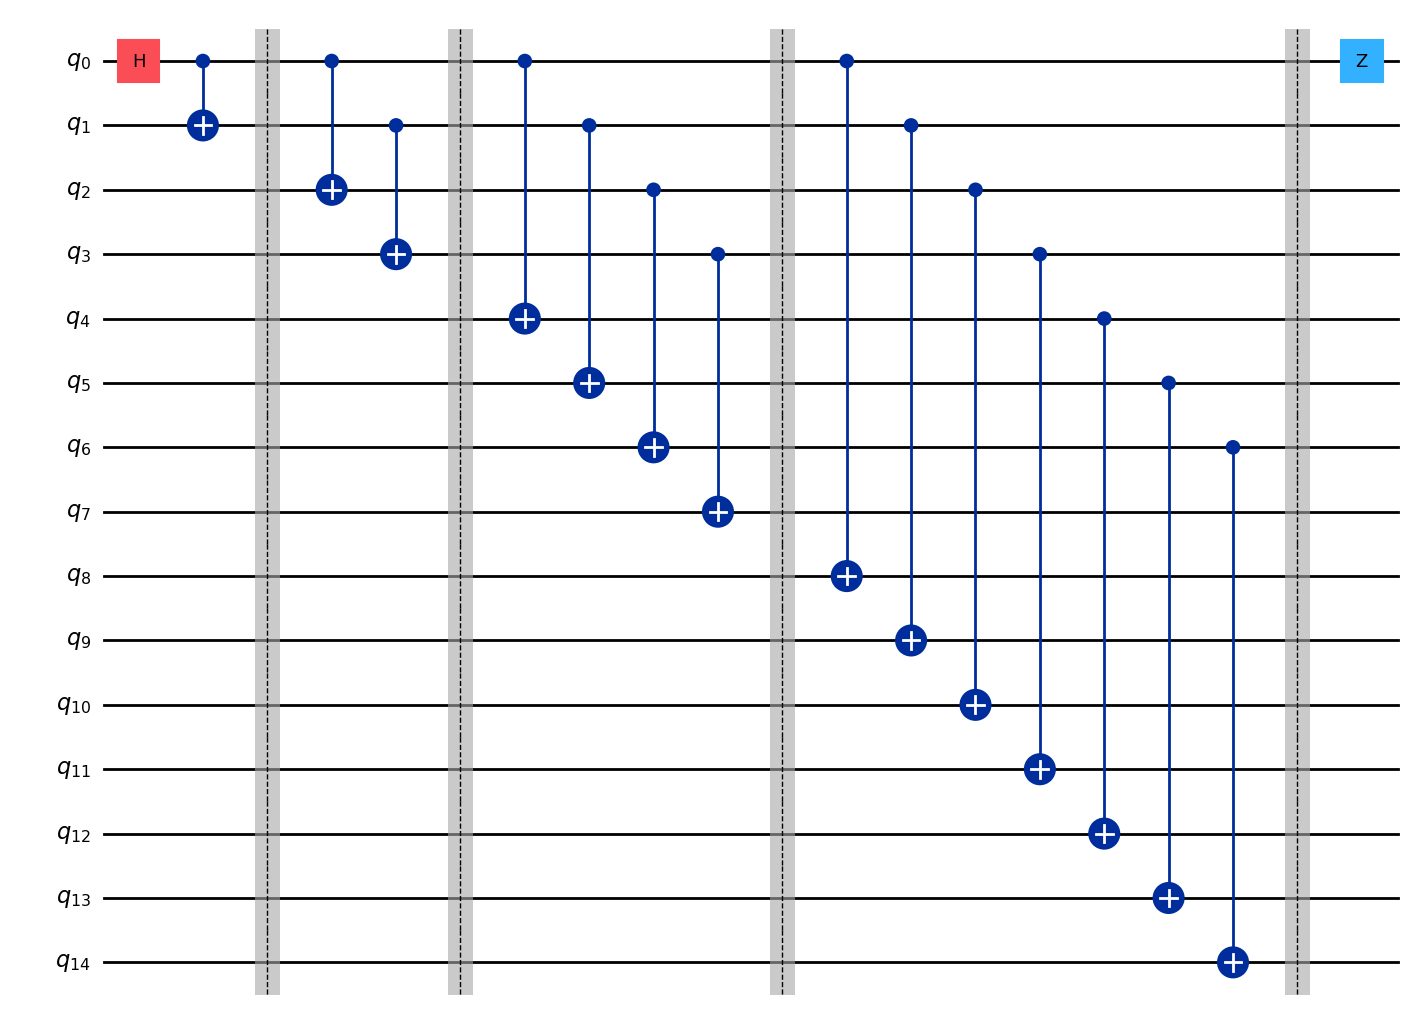

In [93]:
qc = solve(15)

qc.draw('mpl')

In [94]:
from qiskit.quantum_info import Statevector

statevector = Statevector(qc)

statevector.draw('latex')

<IPython.core.display.Latex object>

## Solution Approach  

To generate the quantum state  

$$|\psi\rangle = \frac{1}{\sqrt{2}} (|0...0\rangle_n - |1...1\rangle_n),$$  

we follow these steps:  

1. **Apply Hadamard Gate**:  
   - A Hadamard (`H`) gate is applied to the first qubit (`q_0`) to create an equal superposition:  
     $$|0\rangle \rightarrow \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle).$$  

2. **Apply Controlled-X (CNOT) Gates in Blocks**:  
   - We use a **logarithmic** strategy to entangle all qubits efficiently.  
   - The number of stages required is **`block_num = ceil(log2(n))`**, ensuring an optimal depth.  
   - In each stage `i`, we apply `CNOT` gates from previously entangled qubits to new ones.  
   - The pattern follows:  
     - Stage 0: `q_0 → q_1`  
     - Stage 1: `q_0 → q_2`, `q_1 → q_3`  
     - Stage 2: `q_0 → q_4`, `q_1 → q_5`, `q_2 → q_6`, `q_3 → q_7`  
     - And so on...  

3. **Apply Phase Flip (`Z` Gate) on `q_0`**:  
   - Finally, a `Z` gate is applied to the first qubit to introduce a relative phase of **-1** in the `|1...1⟩` state, ensuring the correct superposition:  
     $$\frac{1}{\sqrt{2}} (|0...0\rangle - |1...1\rangle).$$  

---

## Why Circuit Depth Never Exceeds 6  

- The depth of the circuit is determined by the number of controlled operations in the entanglement process.  
- Since the qubits are entangled **logarithmically**, the number of stages is **log₂(n)**.  
- Given that **`n ≤ 15`**, the maximum number of stages is:  
  $$\lceil \log_2(15) \rceil = 4.$$  
- Including the initial `H` gate and final `Z` gate, the total depth is:  
  $$1 + 4 + 1 = 6.$$  
- Thus, the depth **never exceeds 6**, meeting the problem's constraints.  
